In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
from PIL import Image
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix

tf.random.set_seed(42)


In [2]:
# we load the image data from keras.datasets
(xTrain, yTrain), (xTest, yTest) = mnist.load_data("mnist.npz")

In [3]:
# we need to check the shape of the array
xTrain.shape, yTrain.shape

((60000, 28, 28), (60000,))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38  43 105 255 253 253 253
  253 253 174   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  43 139 224 226 252 253 252 252 252
  252 252 252 158  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252
  252 252 252 252  59   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109 252 252 230 132 133 13

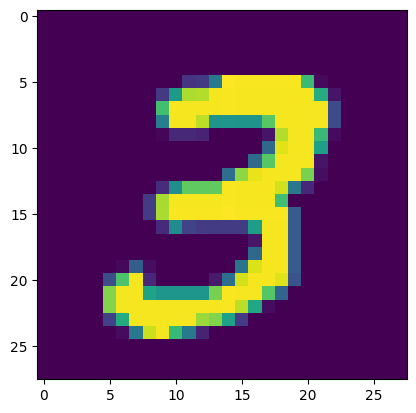

In [4]:
# print some images from this dataset
print(xTrain[7])
plt.imshow(xTrain[7])

In [5]:
# we need to normalize the data to get the highest accuracy
xTrain = xTrain / 255.0
xTest = xTest / 255.0

In [6]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])
# compile the model
model.compile(
    loss = tf.losses.SparseCategoricalCrossentropy,
    optimizer = tf.optimizers.Adam(learning_rate = 4.466e-04),
    metrics = ["accuracy"]
)

# we need to fit into the model
model.fit(xTrain, yTrain, epochs=200)

Epoch 1/200


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 625us/step - accuracy: 0.8374 - loss: 0.5569
Epoch 2/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 627us/step - accuracy: 0.9609 - loss: 0.1337
Epoch 3/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - accuracy: 0.9729 - loss: 0.0911
Epoch 4/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 635us/step - accuracy: 0.9792 - loss: 0.0688
Epoch 5/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.9840 - loss: 0.0538
Epoch 6/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.9869 - loss: 0.0415
Epoch 7/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.9884 - loss: 0.0362
Epoch 8/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - accuracy: 0.9895 - loss: 0.0314
Epoch 9/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.9910 - loss: 0.0284
Epoch 10/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - accuracy: 0.9927 - loss: 0.0225
Epoch 11/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.9930 - loss: 0.0212
Epoch 12/

In [7]:
model.evaluate(xTest, yTest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - accuracy: 0.9786 - loss: 0.3819


[0.29717564582824707, 0.9817000031471252]

In [8]:
sample = np.expand_dims(xTrain[7], axis=0)

out = model.predict(sample)

out = np.squeeze(out)

samplePrediction = np.argmax(out)

print(f"The predicted class is: {samplePrediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
The predicted class is: 3


In [9]:
yPreds = model.predict(xTest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step


In [10]:
yPredLabels = [np.argmax(i) for i in yPreds]
yPredLabels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 8,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [11]:
confusionMatrix = confusion_matrix(yTest, yPredLabels)
print(confusionMatrix)

tf.Tensor(
[[ 970    1    0    1    0    1    2    0    3    2]
 [   0 1129    1    0    0    0    2    1    2    0]
 [   3    0 1014    3    2    0    1    5    4    0]
 [   0    1    3  988    0    8    0    5    5    0]
 [   0    0    2    0  961    1    3    4    1   10]
 [   1    0    0   13    0  873    1    0    3    1]
 [   3    3    3    1    2    3  942    1    0    0]
 [   0    3    8    1    2    0    0 1008    2    4]
 [   2    0    2    4    2    5    0    4  953    2]
 [   1    2    0    3    9    3    0    8    4  979]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

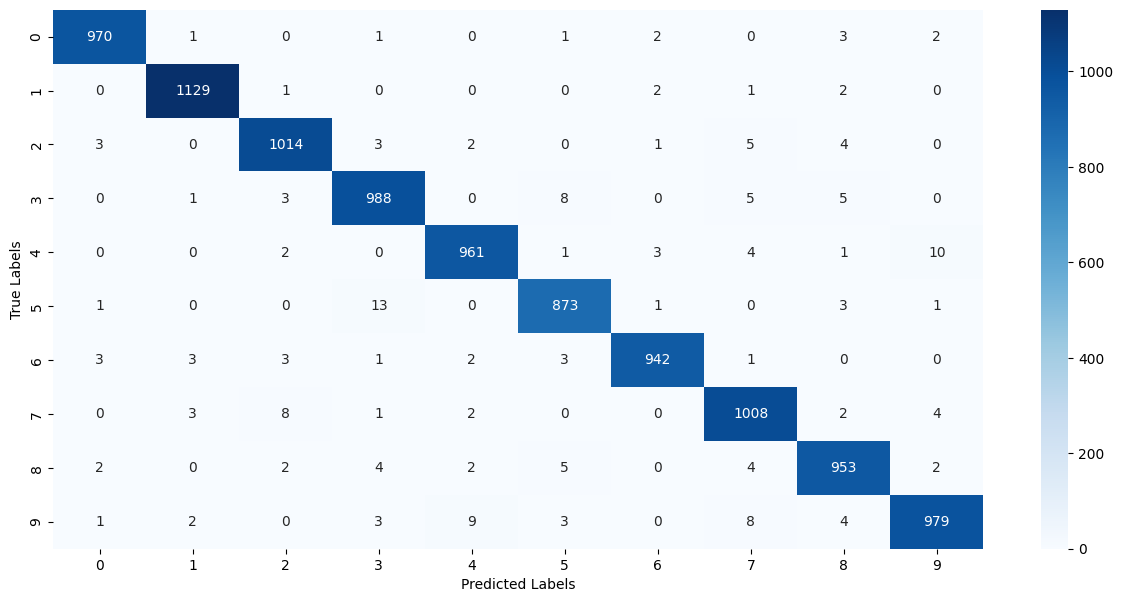

In [12]:
plt.figure(figsize=(15, 7))
sns.heatmap(confusionMatrix, annot = True, fmt = 'd', cmap = "Blues")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")


In [44]:
imagePath = 'name of the image or path of the image'
inputImage = cv2.imread(imagePath)
grayScale = cv2.cvtColor(inputImage, cv2.COLOR_RGB2GRAY)
resizedImage = cv2.resize(grayScale, (28, 28))
resizedImage = resizedImage / 255.0
reshapedImage = np.reshape(resizedImage, [1, 28, 28])
inPrediction = model.predict(reshapedImage)
inPredLabel = np.argmax(inPrediction)
inPredLabel 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


5